# Importing libraries

In [1]:
import mysql.connector
#for writing edgelist to a file
import csv
import sys 
#for network mining
import networkx as nx
import operator
import matplotlib.pyplot as plt
from community import community_louvain
import matplotlib.cm as cm

# Connecting to Database

In [2]:
db = mysql.connector.connect(user='root', password='',host='localhost',database="test" )
cursor = db.cursor(buffered=True)

## Confirming Connectection

In [3]:
cursor.execute("SELECT COUNT(*) FROM rf_developer_projects")
p = cursor.fetchone()
print(p)

(514164,)


# Data Preparation

### Datasource id: 266
### Finding number of projects (a,b) work on {(b,a) is excluded because undirected graph}

Finding the developers working on same project and this info is gathered from datasource id 266  and (a,b) and (b,a) aren't in this

In [4]:
cursor.execute("SELECT a.proj_unixname, a.dev_loginname, b.dev_loginname \
                FROM rf_developer_projects a \
                INNER JOIN rf_developer_projects b \
                ON a.proj_unixname=b.proj_unixname \
                WHERE a.datasource_id = 266 AND b.datasource_id = 266 \
                AND a.dev_loginname != b.dev_loginname \
                AND a.dev_loginname < b.dev_loginname")

result = cursor.fetchall()
print(len(result))
for res in result:
    print(f"{res[0]}\t\t\t\t{res[1]}\t\t\t\t{res[2]}")

9465
				jimcropcho				tobinibot
				dolphin				jbrown
				dolphin				justinperkins
				jbrown				justinperkins
				dolphin				rauschuber
				jbrown				rauschuber
				justinperkins				rauschuber
				dolphin				syarak
				jbrown				syarak
				justinperkins				syarak
				rauschuber				syarak
				dolphin				thinknot
				jbrown				thinknot
				justinperkins				thinknot
				rauschuber				thinknot
				syarak				thinknot
				assaph				shawn42
				masukomi				pboling
				kubano				sharnik
				kubano				troonx
				sharnik				troonx
				mackato				yazu
				lucboudreau				moro
				bitsweat				webster132
				bitsweat				webster132
				icd				menthal
				dweinand				kosmas
				dweinand				purestorm
				kosmas				purestorm
				adehay				virtualmice
				filefrog				jmecham
				cdouglas				cjheath
				cfauser				jmacaulay
				cfauser				soleone
				jmacaulay				soleone
				cfauser				xal
				jmacaulay				xal
				soleone				xal
				ikbeneyal				metaman
				ikbeneyal				michaeldiamond
				metaman				mic

				nicwilliams				szimek
				binnymathew				nishant_nyn
				binnymathew				ravindrabangera
				nishant_nyn				ravindrabangera
				binnymathew				timthetraveler
				nishant_nyn				timthetraveler
				ravindrabangera				timthetraveler
				cabyrus				killfill
				blarneyrabble				dougschuler
				blarneyrabble				gort79
				dougschuler				gort79
				blarneyrabble				jtswims
				dougschuler				jtswims
				gort79				jtswims
				blarneyrabble				tsuyoshi
				dougschuler				tsuyoshi
				gort79				tsuyoshi
				jtswims				tsuyoshi
				crazypit				dimaexe
				crazypit				technomancy
				dimaexe				technomancy
				crazypit				tomtt
				dimaexe				tomtt
				technomancy				tomtt
				dido				flameeyes
				hongli				prototype
				awieland				fat
				awieland				jetienne
				fat				jetienne
				awieland				steer
				fat				steer
				jetienne				steer
				michaelklishin				transami
				aaronbatalion				damickjj
				aaronbatalion				efrederick
				damickjj				efrederick
				aaronbatalion				valeksenko
		

				mpompilio				osoh
				blueswind8306				nasi
				aleran				alexch
				aleran				amilligan
				alexch				amilligan
				aleran				btakita
				alexch				btakita
				amilligan				btakita
				aleran				codeword
				alexch				codeword
				amilligan				codeword
				btakita				codeword
				aleran				coreyti
				alexch				coreyti
				amilligan				coreyti
				btakita				coreyti
				codeword				coreyti
				aleran				dav
				alexch				dav
				amilligan				dav
				btakita				dav
				codeword				dav
				coreyti				dav
				aleran				dgoudreau
				alexch				dgoudreau
				amilligan				dgoudreau
				btakita				dgoudreau
				codeword				dgoudreau
				coreyti				dgoudreau
				dav				dgoudreau
				aleran				edwardh
				alexch				edwardh
				amilligan				edwardh
				btakita				edwardh
				codeword				edwardh
				coreyti				edwardh
				dav				edwardh
				dgoudreau				edwardh
				aleran				grafton
				alexch				grafton
				amilligan				grafton
				btakita				grafton
				codeword				grafton
				coreyti				g

				martint				tewk
				mental				tewk
				puellula				tewk
				headius				yawl
				martint				yawl
				mental				yawl
				puellula				yawl
				tewk				yawl
				acangiano				alexp
				acangiano				kfbombar
				alexp				kfbombar
				acangiano				manas
				alexp				manas
				kfbombar				manas
				acangiano				mbriggs
				alexp				mbriggs
				kfbombar				mbriggs
				manas				mbriggs
				acangiano				praveend
				alexp				praveend
				kfbombar				praveend
				manas				praveend
				mbriggs				praveend
				karlos13				steux
				drbrain				luislavena
				drbrain				zenspider
				luislavena				zenspider
				ahunt				curthibbs
				ahunt				luislavena
				curthibbs				luislavena
				ahunt				vertiginal
				curthibbs				vertiginal
				luislavena				vertiginal
				dominikh				neelance
				mindtriggerz				simonp
				mindtriggerz				starjunky
				simonp				starjunky
				mindtriggerz				tpolonsky
				simonp				tpolonsky
				starjunky				tpolonsky
				chadfowler				rich
				bart_matthaei				mmc
				de

Finding the number of devs having worked with a dev

In [5]:
cursor.execute("SELECT a.dev_loginname, COUNT(b.dev_loginname) \
                FROM rf_developer_projects a \
                INNER JOIN rf_developer_projects b \
                ON a.proj_unixname = b.proj_unixname \
                WHERE a.datasource_id = 266 \
                AND b.datasource_id = 266 \
                AND a.dev_loginname != b.dev_loginname \
                AND a.dev_loginname < b.dev_loginname \
                GROUP BY 1 \
                ORDER BY 2 DESC")
result = cursor.fetchall()
for res in result:
    print(f"{res[0]}\t\t\t{res[1]}")

btakita			72
drbrain			69
arto			67
ezmobius			63
aaronp			62
chadfowler			47
alexch			44
bhuga			43
alexeyv			42
bernerdschaefer			42
afcool83			41
dbussink			37
headius			33
dkubb			33
djberg96			33
aaronbatalion			33
coreyti			33
luislavena			33
cardmagic			31
aemadrid			31
codeword			30
bbazzarrakk			30
aleran			30
asceth			29
azzoti			29
erikhatcher			28
amilligan			28
bill_dortch			27
binarywaterfall			27
ko1			27
grafton			27
designingpatts			26
chrononaut			26
chadj			26
deployer			26
crichey			25
alexander			25
alles			25
cptoatmeal			25
imf			25
charley			24
eos8d			24
joshsusser			24
dannylagrouw			24
arrakis			24
dav			24
damickjj			24
aymeric			23
dgoudreau			23
jkingdon			23
kou			23
daveadams			23
lrz			23
joemoore			23
evan			22
disturbyte			22
bret			22
enebo			22
jaron			22
bel8			22
edwardh			22
nathansobo			22
cathalmagus			21
blackhedd			21
austin			21
gotmayonase			21
fausto			21
cfis			21
mneumann			20
ntalbott			20
jamieorc			20
heimidal			20
kapheine			20
daf		

Finding the devs having worked with 'ezmobius' on project(s)

In [6]:
cursor.execute("SELECT a.proj_unixname, a.dev_loginname, b.dev_loginname \
                FROM rf_developer_projects a \
                INNER JOIN rf_developer_projects b \
                ON a.proj_unixname=b.proj_unixname \
                WHERE a.datasource_id = 266 AND b.datasource_id = 266 \
                AND a.dev_loginname != b.dev_loginname \
                AND a.dev_loginname < b.dev_loginname \
                AND a.dev_loginname = 'ezmobius'")
result = cursor.fetchall()
for res in result:
    print(f"{res[0]}\t\t\t\t{res[1]}\t\t\t\t{res[2]}")

				ezmobius				ssmoot
				ezmobius				tmm1
				ezmobius				wayneeseguin
				ezmobius				wycats
				ezmobius				gnufied
				ezmobius				skaar
				ezmobius				gotmayonase
				ezmobius				heimidal
				ezmobius				ior3k
				ezmobius				iorek
				ezmobius				joshmh
				ezmobius				jtoy
				ezmobius				knowtheory
				ezmobius				lanaer
				ezmobius				mayo
				ezmobius				mr_eel
				ezmobius				napx
				ezmobius				pimpmaster
				ezmobius				psadauskas
				ezmobius				railsaddict
				ezmobius				reinh
				ezmobius				silentseraph
				ezmobius				simondo
				ezmobius				ssmoot
				ezmobius				sutto
				ezmobius				thanatos
				ezmobius				vanpelt
				ezmobius				wycats
				ezmobius				michaelklishin
				ezmobius				psadauskas
				ezmobius				ssmoot
				ezmobius				wycats
				ezmobius				loobmedia
				ezmobius				ivey
				ezmobius				loobmedia
				ezmobius				matt_a
				ezmobius				michaelklishin
				ezmobius				ssmoot
				ezmobius				wycats
				ezmobius				hassox
				ezmobius				ivey
				ezm

Finding the number of projects two devs have worked together on

In [7]:
cursor.execute("SELECT a.dev_loginname, b.dev_loginname, count(a.proj_unixname) \
                FROM rf_developer_projects a \
                INNER JOIN rf_developer_projects b ON a.proj_unixname=b.proj_unixname \
                WHERE a.datasource_id = 266 AND b.datasource_id = 266 \
                AND a.dev_loginname != b.dev_loginname \
                AND a.dev_loginname < b.dev_loginname \
                GROUP BY 1,2 \
                ORDER BY 3 DESC")

result = cursor.fetchall()
for res in result:
    print(f"{res[0]}\t\t\t\t{res[1]}\t\t\t\t{res[2]}")

arto				bhuga				23
bhuga				macbert				19
arto				macbert				19
mhatakeyama				zdavatz				16
jbasdf				oxtralite				14
drbrain				zenspider				13
bhuga				jhuckabee				12
arto				jhuckabee				12
disturbyte				macbert				11
bhuga				disturbyte				11
arto				disturbyte				11
jhuckabee				macbert				11
disturbyte				jhuckabee				10
aaronbatalion				efrederick				9
aaronbatalion				damickjj				9
efrederick				valeksenko				9
janetleland				tonystrauss				9
damickjj				valeksenko				9
designingpatts				tonystrauss				9
aaronbatalion				valeksenko				9
designingpatts				janetleland				9
damickjj				efrederick				9
btakita				thewoolleyman				8
blaumag				djanowski				7
bitsweat				webster132				7
damickjj				taf2				6
aaronbatalion				taf2				6
luislavena				zenspider				6
ezmobius				wycats				6
taf2				valeksenko				6
aaronp				jbarnette				6
lancelot				wayneeseguin				6
efrederick				taf2				6
drbrain				luislavena				6
chadfowler				rich				6
dcrosby42				karlinfox				5
baldwina				jsg

sundeep				supratim				1
rich				znz				1
bill_dortch				headius				1
nwilmes				sconover				1
ktowle				yelloh99				1
bfioca				cardmagic				1
ssmoot				vanpelt				1
martinrehfeld				sleistner				1
donmullen				jasonrudolph				1
kman				stuarthalloway				1
rabiedenharn				stabar				1
dpruessner				oli2007				1
elcubo				larsin				1
jjf				mwmitchell				1
lukeredpath				tastapod				1
mjevers				pascalvc				1
lstoll				luislavena				1
jsgarvin				orangewolf				1
lkanies				nigelkersten				1
michaelkelly				pegasus81				1
asceth				mr_eel				1
freecycles				nhatt				1
ssteadman				theiceberk				1
aaronp				wanderingmatt				1
roscopeco				yeban				1
dnz				kazukisan				1
bel8				tlockney				1
lean				yvesf				1
cyent				zachdennis				1
stevejenson				woodie				1
cail				cmaujean				1
fausto				kman				1
codeword				shifrapr				1
matiasp				uncled				1
schubert				thewoolleyman				1
cmills				pinguin751				1
mikem836				yob				1
cklone				gfodor				1
skaar				superchris				1
koichiro				ps

mberezow				svnuser				1
dominiek				skill				1
billd				panpainter				1
jjordan				mahlon				1
bluemonk				tdoan				1
alexander				nomeata				1
jkeck				tony_zanella				1
drbrain				vertiginal				1
jonathanm				swistak				1
rich				why				1
mchung				preston				1
dgoudreau				rdy				1
ktowle				ntalbott				1
alide				phananhvu				1
psadauskas				thanatos				1
aharper				topfunky				1
olabini				serabe				1
ntkhanh				rebroken				1
kristianh				zond				1
baconpat				wsm66				1
mniessner				rich				1
dave_oilar				kungfu_fightin				1
olabini				pvtilburg				1
giles_bowkizzo				rdjenk				1
buchmui				buergep				1
cfis				gvellut				1
chrismo				marekj				1
bernerdschaefer				lanaer				1
sterrym				zukunftsalick				1
binarywaterfall				dpp				1
kingches				ronmckown				1
cfis				pate				1
emiel				jamstah				1
lckarssen				pterjan				1
raz				smudge03				1
blackhedd				shino				1
mital_d_vora				supratim				1
ntalbott				znz				1
enebo				fausto				1
nathansobo				sconover				1
rdenatale	

arielvalentin				gardnercr				1
crichey				kman				1
aleran				shifrapr				1
edhowland				jeffbski				1
rrussell				schubert				1
simondo				wycats				1
mikem836				odaeus				1
jgehtland				stuarthalloway				1
nolman				superchris				1
luislavena				normalperson				1
dot				koichiro				1
jmhodges				lifofifo				1
gaizka				ians				1
matt_a				sfuchs				1
lstoll				wilson				1
fixxer				mikhail				1
cho45				shimada-k				1
marekj				programr				1
heimidal				napx				1
mugathur				zdavatz				1
maelman				wblarson				1
jaysonjayjump				wwi05e				1
mlewin				saajan				1
iancmcc				tmalone				1
quana				say				1
livelearncode				scottned				1
florin_patrascu				wbruce				1
cmaujean				patsplat				1
dgoudreau				steadman				1
mdemers				mikedemers				1
epugh				erikhatcher				1
mbarchfe				oleg_s				1
lypanov				rue				1
davidm				jfleck				1
chadj				tirsen				1
takai				yone098				1
apollo				cortel				1
paw220470				scknight				1
mbaumbach				zabouti				1
kfbombar				mbriggs				1
dorogoy	

### Exporting the last table into a csv

In [8]:
c = csv.writer(open('edgelist266.csv', 'w', encoding = 'utf-8'), delimiter=' ')
for re in result:    
    c.writerow(re)  

# Network Mining

##### Loading the csv into a graph g and displaying degree of each node

In [9]:
g = nx.read_weighted_edgelist('edgelist266.csv')
print(f"Is the graph connected? {nx.is_connected(g)}")

Is the graph connected? False


In [10]:
degree = nx.degree(g)
print("The degree of each node of the graph is: ")
for deg in degree:
    print(deg)

The degree of each node of the graph is: 
('arto', 6)
('bhuga', 5)
('macbert', 5)
('mhatakeyama', 5)
('zdavatz', 5)
('jbasdf', 1)
('oxtralite', 1)
('drbrain', 54)
('zenspider', 93)
('jhuckabee', 5)
('disturbyte', 5)
('aaronbatalion', 4)
('efrederick', 4)
('damickjj', 4)
('valeksenko', 4)
('janetleland', 3)
('tonystrauss', 3)
('designingpatts', 10)
('btakita', 48)
('thewoolleyman', 56)
('blaumag', 7)
('djanowski', 9)
('bitsweat', 7)
('webster132', 7)
('taf2', 6)
('luislavena', 42)
('ezmobius', 56)
('wycats', 58)
('aaronp', 52)
('jbarnette', 19)
('lancelot', 18)
('wayneeseguin', 26)
('chadfowler', 39)
('rich', 54)
('dcrosby42', 10)
('karlinfox', 28)
('baldwina', 2)
('jsgarvin', 3)
('ssmoot', 41)
('nathansobo', 34)
('alles', 10)
('wbruce', 27)
('crowley', 10)
('ph7', 9)
('tom', 27)
('codigorama', 1)
('hallison', 1)
('nkallen', 33)
('michaelklishin', 15)
('cmaujean', 14)
('erikh', 16)
('byllc', 5)
('foca', 1)
('srt', 4)
('ssayles', 17)
('xandy', 15)
('aiwilliams', 7)
('jlong', 11)
('dbussi

('blackb0x29a', 4)
('darrendao', 1)
('jheiss', 1)
('rfort9999999', 1)
('jdudley', 4)
('bomma', 2)
('reneb', 4)
('roelofr', 4)
('seanlong', 6)
('mhartl', 4)
('ritscher', 4)
('markj9', 1)
('schambers', 1)
('nytimes', 1)
('ghostroad', 2)
('ahoward', 2)
('cmcbride', 2)
('elvanja', 4)
('jbeduya', 3)
('cleavese', 4)
('benr75', 1)
('blimper', 1)
('radhas1042', 5)
('hallcp', 1)
('kubo', 2)
('brett', 3)
('dtsato', 2)
('pnomolos', 4)
('rozza', 4)
('fdiotalevi', 4)
('hasmukhrathod', 1)
('saurabhbhatia', 2)
('derkaan', 1)
('oldhand', 1)
('daigo', 2)
('lourens', 3)
('alfatier', 2)
('bspencer', 2)
('plaplante', 3)
('mikeparr', 1)
('jcangas', 2)
('kotp', 3)
('bungee', 1)
('murase', 1)
('caphe', 1)
('nonocast', 1)
('bigsmoke', 1)
('halfgaar', 2)
('lucasluitjes', 3)
('noah', 2)
('robbyrussell', 3)
('pelargir', 9)
('mislav', 4)
('louisxs', 3)
('al_chou', 1)
('eventualdave', 1)
('tomcloyd', 2)
('cogito', 2)
('man_monkey', 5)
('charlesg3', 1)
('jpkutner', 1)
('ruleby', 1)
('acras', 1)
('romuloceccon', 1)


In [11]:
numNodes = nx.number_of_nodes(g)
numEdges = nx.number_of_edges(g)
minDegree = min(dict(degree).values())
maxDegree = max(dict(degree).values())
print(f"Number of nodes in above graph: {numNodes}")
print(f"Number of edges is {numEdges}")
print(f"Minimum degree is {minDegree}")
print(f"Maximum degree is {maxDegree}")

Number of nodes in above graph: 3097
Number of edges is 8574
Minimum degree is 1
Maximum degree is 93


In [12]:
degreeSorted = sorted(dict(degree).items(), key=operator.itemgetter(1),reverse=True)
print('The 10 highest degrees in the graph are: ')
for deg in degreeSorted[0:10]:
    print(deg)

The 10 highest degrees in the graph are: 
('zenspider', 93)
('wycats', 58)
('thewoolleyman', 56)
('ezmobius', 56)
('drbrain', 54)
('rich', 54)
('aaronp', 52)
('btakita', 48)
('nicksieger', 47)
('olabini', 46)


##### Plotting the Graph

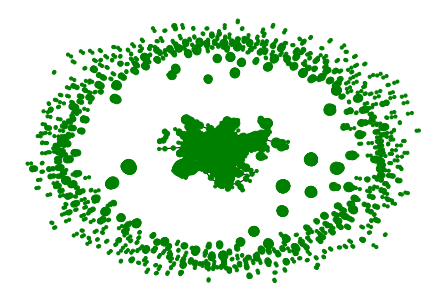

In [13]:
nx.draw(g,node_size=[v * 10 for v in dict(degree).values()],node_color='g')
plt.show()

#### Removing unrequired nodes and plotting the new graph

In [14]:
g2 = g.copy()
d2 = nx.degree(g2)
for n in g.nodes():
    if d2[n] <= 1:
        g2.remove_node(n)

In [15]:
g2numNodes = nx.number_of_nodes(g2)
g2numEdges = nx.number_of_edges(g2)
print(f"After removing the edges of degree 1")
print(f"Number of nodes: {g2numNodes}")
print(f"Number of edges: {g2numEdges}")
print(f"Is the graph connected: {nx.is_connected(g2)}")
print(f"Number of connected components: {nx.number_connected_components(g2)}")

After removing the edges of degree 1
Number of nodes: 2146
Number of edges: 7976
Is the graph connected: False
Number of connected components: 226


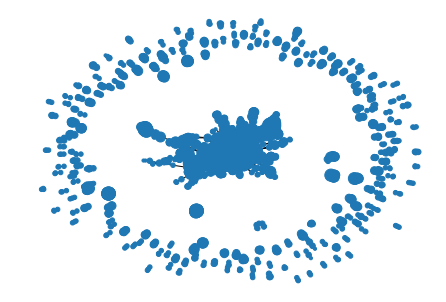

In [16]:
nx.draw(g2, node_size=[v * 10 for v in dict(d2).values()])
plt.show()

### Finding the connected component subgraphs

In [17]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

In [18]:
graphs = connected_component_subgraphs(g2)
graphsSorted = sorted(graphs, key=len, reverse=True)
print("The subgraphs in new graph in descending order are having number of nodes:")
for graph in graphsSorted:
    print(nx.number_of_nodes(graph))

The subgraphs in new graph in descending order are having number of nodes:
1142
25
16
16
15
15
15
13
11
10
9
9
9
8
8
8
8
7
7
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
1
1
1
1
1
1
1


In [19]:
print("For the four subgraphs with highest nodes, ")
for graph in graphsSorted[1:4]:
    print("Number of nodes:",nx.number_of_nodes(graph))
    graphDegree = nx.degree(graph)
    print("Degree:")
    for deg in graphDegree:
        print(deg)
    print('---------------------------------')

For the four subgraphs with highest nodes, 
Number of nodes: 25
Degree:
('mannie', 18)
('tlaurent', 6)
('spence2', 7)
('drn05r', 19)
('fbacall', 13)
('stuzart', 6)
('giannioneill', 13)
('dgc', 13)
('stevenyoung', 7)
('jamesscottbrown', 7)
('alekses6', 13)
('dder', 13)
('withers', 13)
('dtm', 13)
('biocat-user', 6)
('mmr', 13)
('tom_eveleigh', 13)
('raz', 7)
('smudge03', 7)
('ebontane', 6)
('kkollara', 13)
('johnpybus', 7)
('ftanoh', 6)
('jits', 18)
('mib104', 19)
---------------------------------
Number of nodes: 16
Degree:
('smithsf', 15)
('jrickard', 15)
('zukunftsalick', 15)
('sterrym', 15)
('jaybaydala', 15)
('mneill', 14)
('charliegodsoe', 15)
('tansylam', 15)
('joegaudet', 15)
('requnix', 15)
('svnuser', 15)
('mberezow', 15)
('stevenghines', 15)
('jsauter', 15)
('roviehc', 14)
('lgomes', 15)
---------------------------------
Number of nodes: 16
Degree:
('todayhill', 7)
('saajan', 8)
('brianj', 8)
('dongbin', 7)
('mlewin', 8)
('knill13', 8)
('railscn', 7)
('dnz', 8)
('allenzhong',

###### Drawing the graph using one node as reference

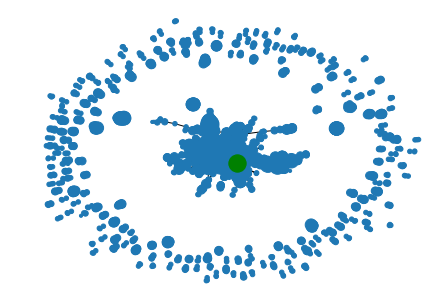

In [20]:
graphDegree = nx.degree(g2)
pos = nx.spring_layout(g2)
nx.draw(g2,pos,node_size=[v * 10 for v in dict(graphDegree).values()],with_labels=False,font_size=8)
nx.draw_networkx_nodes(g2,pos,nodelist=['tirsen'],node_size=300,node_color='g')
plt.show()

### Cliques

In [21]:
i = 0
for graph in graphsSorted[0:5]:
    i += 1
    print('Number of nodes in graph',i,':',nx.number_of_nodes(graph))
    graphDegree = nx.degree(graph)
    
    cliques = list(nx.find_cliques(graph))
    print(f'The cliques for graph {i} are:')
    for c in cliques:
        print(f'->{c}')
        
    print(f'The betweenness centrailty for graph {i} is')
    ev=nx.betweenness_centrality(graph)
    
    evSorted = sorted(ev.items(),key= operator.itemgetter(1),reverse=True)
    
    for key,val in evSorted:
        print(key,str(round(val,2)))
    print('------------------------')
    print(f'The eigenvector centrailty for graph {i} is')
    ev = nx.eigenvector_centrality_numpy(graph)
    
    evSorted = sorted(ev.items(),key= operator.itemgetter(1),reverse=True)
    
    for key,val in evSorted:
        print(key,str(round(val,2)))
    print('------------------------')
    print(f'The closeness centrailty for graph {i} is')
    ev = nx.closeness_centrality(graph)
    
    evSorted = sorted(ev.items(),key= operator.itemgetter(1),reverse=True)
    
    for key,val in evSorted:
        print(key,str(round(val,2)))
    print('------------------------')

Number of nodes in graph 1 : 1142
The cliques for graph 1 are:
->['dav', 'wesmaldonado', 'jpalermo', 'littleears', 'nwilmes', 'pergesu', 'btakita', 'steadman', 'dgoudreau', 'nkallen', 'aleran', 'supernate', 'edwardh', 'imf', 'codeword', 'coreyti', 'alexch', 'nathansobo', 'rdy', 'joemoore', 'grafton', 'joshsusser', 'mmichael', 'sconover', 'jkingdon', 'seemiller', 'thewoolleyman', 'stellsmi', 'shifrapr', 'parkert']
->['dav', 'wesmaldonado', 'jpalermo', 'littleears', 'nwilmes', 'pergesu', 'btakita', 'steadman', 'dgoudreau', 'nkallen', 'aleran', 'supernate', 'edwardh', 'imf', 'codeword', 'coreyti', 'alexch', 'nathansobo', 'rdy', 'joemoore', 'grafton', 'joshsusser', 'mmichael', 'sconover', 'jkingdon', 'seemiller', 'thewoolleyman', 'stellsmi', 'shifrapr', 'amilligan']
->['srrao', 'zeljkofilipin', 'ati_ozgur', 'ljorquera', 'jmccarthy', 'pmr16366', 'marekj', 'bret', 'angrez', 'cmcmahon', 'charley', 'michaelkelly', 'karlinfox', 'dragonkh', 'chrismo', 'esh', 'pegasus81', 'programr', 'jonathankoh

zenspider 0.13
lrz 0.12
tmm1 0.12
luislavena 0.11
aaronp 0.11
nolman 0.1
charley 0.09
ezmobius 0.08
thewoolleyman 0.08
srbaker 0.07
why 0.07
drbrain 0.07
jaron 0.07
wycats 0.06
binarywaterfall 0.06
znz 0.06
rich 0.05
curthibbs 0.05
chadfowler 0.05
nicksieger 0.05
olabini 0.05
matt_a 0.05
karlinfox 0.04
pate 0.04
cho45 0.04
secondlife 0.04
headius 0.04
blackhedd 0.04
joshknowles 0.03
neoneye 0.03
manveru 0.03
drummr77 0.03
yob 0.03
dpp 0.03
skaar 0.03
townxelliot 0.03
wbruce 0.03
dcmanges 0.03
defunkt 0.03
mneumann 0.03
stuarthalloway 0.03
zachdennis 0.03
zond 0.03
bbazzarrakk 0.02
gunark 0.02
alexeyv 0.02
jnewland 0.02
austin 0.02
mental 0.02
jbarnette 0.02
erikhatcher 0.02
technomancy 0.02
jaymcgavren 0.02
sam 0.02
walf443 0.02
ssmoot 0.02
loobmedia 0.02
danj 0.02
nicwilliams 0.02
takiuchi 0.02
logan_barnett 0.02
freelancing_god 0.02
ntalbott 0.02
kapheine 0.02
lukeredpath 0.02
djberg96 0.02
wyhaines 0.02
zedshaw 0.02
cfis 0.02
bleything 0.02
ekolve 0.02
raggi 0.02
wayneeseguin 0.02
k

wycats 0.19
ezmobius 0.19
ssmoot 0.18
pimpmaster 0.18
afcool83 0.18
mr_eel 0.18
dbussink 0.18
psadauskas 0.18
bernerdschaefer 0.18
dkubb 0.18
mayo 0.17
thanatos 0.17
cardmagic 0.17
railsaddict 0.17
heimidal 0.17
chrononaut 0.17
gotmayonase 0.17
joshmh 0.17
jtoy 0.17
reinh 0.17
lanaer 0.17
knowtheory 0.17
simondo 0.17
napx 0.17
silentseraph 0.17
vanpelt 0.17
iorek 0.17
cptoatmeal 0.17
asceth 0.17
aemadrid 0.17
ior3k 0.17
sutto 0.17
luislavena 0.06
michaelklishin 0.05
wayneeseguin 0.05
ivey 0.05
hassox 0.04
lemon 0.04
lancelot 0.04
jfreeze 0.04
matt_a 0.03
tmm1 0.03
loobmedia 0.02
ciconia 0.02
jeremy2 0.02
siebertm 0.02
rydahl 0.02
wyhaines 0.01
zedshaw 0.01
mental 0.01
peterkz 0.01
llebron 0.01
normalperson 0.01
evanweaver 0.01
filipe 0.01
jbarnette 0.01
aaronp 0.01
skaar 0.01
zenspider 0.01
jncoward 0.01
josevalim 0.01
thewoolleyman 0.01
cypher 0.01
mislav 0.01
gotascii 0.01
mcornick 0.01
crnixon 0.01
brianjlandau 0.01
preagan 0.01
bscofield 0.01
drbrain 0.01
defunkt 0.01
aviflombaum 0

dlitz 0.0
jlawrenc 0.0
toolmantim 0.0
beyond 0.0
davidlee 0.0
lachie 0.0
keithpitty 0.0
benj72 0.0
lachlanhardy 0.0
maxm 0.0
bschwarz 0.0
kevinclark 0.0
jdl 0.0
johankellum 0.0
hongli 0.0
semmons99 0.0
alexh 0.0
portugueserb 0.0
sdsantos 0.0
mgcm 0.0
jpantunes 0.0
mffreire 0.0
tpinto 0.0
alflol 0.0
braceta 0.0
include 0.0
ugly 0.0
bshow 0.0
koichiro 0.0
walf443 0.0
dot 0.0
kakutani 0.0
tokuhirom 0.0
takai 0.0
yone098 0.0
fschwach 0.0
jdudley 0.0
anotherbritt 0.0
robey 0.0
gaba 0.0
yossarian 0.0
ketan 0.0
mfoemmel 0.0
buildr4eclipse 0.0
jbouwman 0.0
baribal 0.0
ikegami 0.0
twrailsconfpair 0.0
uncled 0.0
rgcottrell 0.0
esomnie 0.0
matiasp 0.0
jeremy6d 0.0
seven5 0.0
rolsen 0.0
dkoontz 0.0
aquinom 0.0
logustus 0.0
fdevillamil 0.0
pdcawley 0.0
jamesgbritt 0.0
krawek 0.0
stoofer 0.0
dtsato 0.0
lotswholetime 0.0
dcolthorp 0.0
kosmas 0.0
dweinand 0.0
seanlong 0.0
brokentoy 0.0
roys 0.0
nicreations 0.0
chauk-mean 0.0
eumario 0.0
tavon 0.0
cdemyanovich 0.0
cyent 0.0
merc 0.0
yaroslav 0.0
max_la

withers 0.0
dtm 0.0
biocat-user 0.0
mmr 0.0
tom_eveleigh 0.0
raz 0.0
smudge03 0.0
ebontane 0.0
kkollara 0.0
johnpybus 0.0
ftanoh 0.0
------------------------
The eigenvector centrailty for graph 2 is
mib104 0.28
drn05r 0.28
mannie 0.27
jits 0.27
giannioneill 0.25
fbacall 0.25
alekses6 0.25
tom_eveleigh 0.25
dder 0.25
withers 0.25
dgc 0.25
dtm 0.25
mmr 0.25
kkollara 0.25
raz 0.07
spence2 0.07
johnpybus 0.07
jamesscottbrown 0.07
smudge03 0.07
stevenyoung 0.07
tlaurent 0.06
biocat-user 0.06
stuzart 0.06
ebontane 0.06
ftanoh 0.06
------------------------
The closeness centrailty for graph 2 is
drn05r 0.83
mib104 0.83
mannie 0.8
jits 0.8
fbacall 0.69
giannioneill 0.69
dgc 0.69
alekses6 0.69
dder 0.69
withers 0.69
dtm 0.69
mmr 0.69
tom_eveleigh 0.69
kkollara 0.69
spence2 0.52
stevenyoung 0.52
jamesscottbrown 0.52
raz 0.52
smudge03 0.52
johnpybus 0.52
tlaurent 0.5
stuzart 0.5
biocat-user 0.5
ebontane 0.5
ftanoh 0.5
------------------------
Number of nodes in graph 3 : 16
The cliques for graph

### Ego Graph

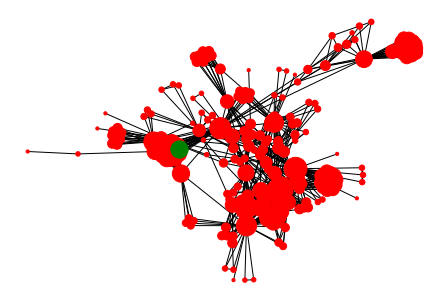

In [22]:
graphs = list(connected_component_subgraphs(g2))
cc = graphs[1]
ego = nx.Graph(nx.ego_graph(cc, 'etopian', radius=3))
graphDegree = nx.degree(ego) 
pos = nx.spring_layout(ego)
# nx.draw(ego,pos,node_size=[v * 10 for v in dict(graphDegree).values()],with_labels=True,font_size=8, node_color='r')
nx.draw(ego,pos,node_size=[v * 10 for v in dict(graphDegree).values()],font_size=8, node_color='r')
nx.draw_networkx_nodes(ego,pos,nodelist=['etopian'],node_size=300,node_color='g')
plt.show()

### Exporting PNG

num nodes in graph 1 : 1142
num nodes in graph 2 : 25
num nodes in graph 3 : 16
num nodes in graph 4 : 16
num nodes in graph 5 : 15


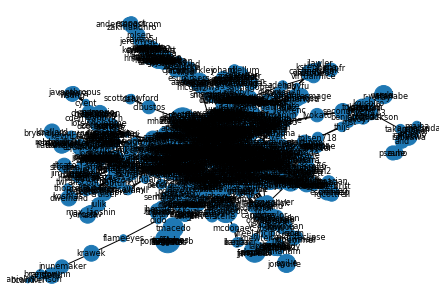

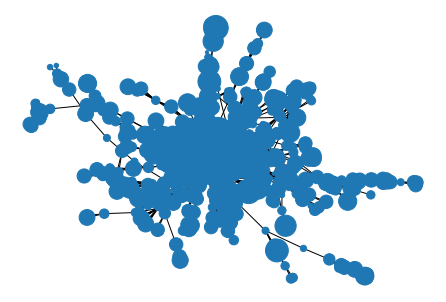

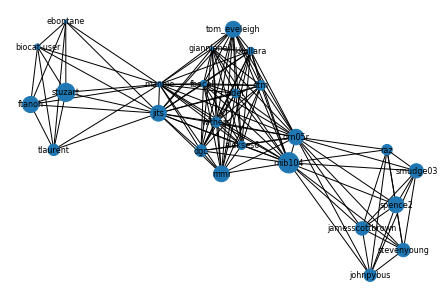

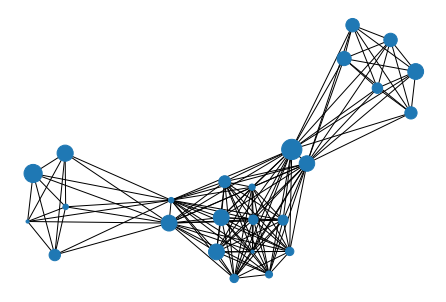

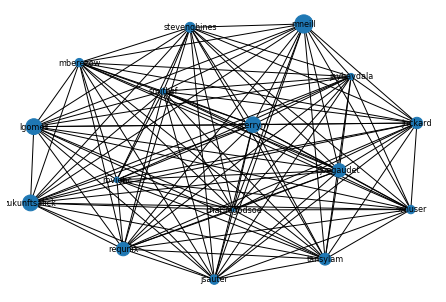

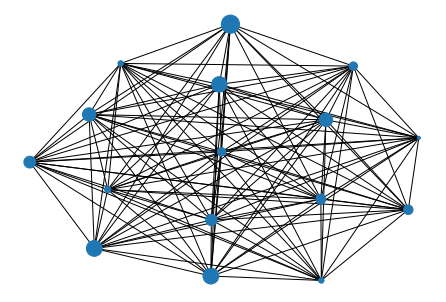

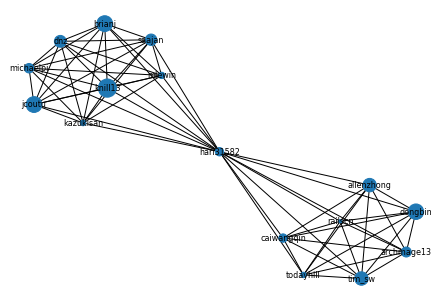

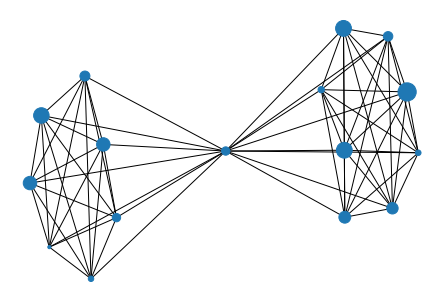

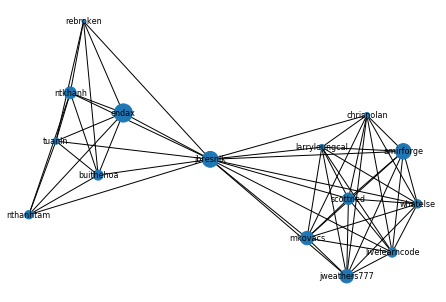

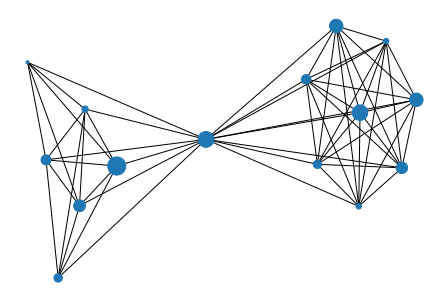

In [23]:
i = 0
for graph in graphsSorted[0:5]:
    i+=1
    print('num nodes in graph',i,':',nx.number_of_nodes(graph))
    #draw one set with name labels
    f1 = plt.figure()
    nx.draw(graph,node_size=[v * 10 for v in dict(graphDegree).values()],with_labels=True,font_size=8)
    filename1 = 'graphLabels'+str(i)+'.png'
    f1.savefig(filename1)
    #draw one set without name labels
    f2 = plt.figure()
    nx.draw(graph,node_size=[v * 10 for v in dict(graphDegree).values()],font_size=8)
    filename2 = 'graph'+str(i)+'.png'
    f2.savefig(filename2)

### Partition based on color

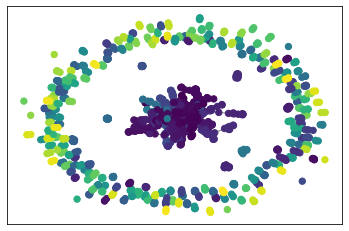

In [24]:
partition = community_louvain.best_partition(g2)
# draw the graph
pos = nx.spring_layout(g2)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(g2, pos, partition.keys(), node_size=40,cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(g2, pos, alpha=0.5)
plt.show()